In [68]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18
unitsvearth = 0 # km/s -> 0 , m/s -> 1

omega_vearth=0.0172 #d^-1
v0=np.array([0,238,0]) #velocidad en reposo local standar (km/s)
v0n=np.sqrt(v0.dot(v0))
vsun=np.array([11.1,12.2,7.3]) #velocidad del sol (km/s)
vesc=544 #velocidad de escape de la galaxia (km/s)
hbar = 6.582e-16 # eV*s
rho=0.3 # dark matter local density Gev/c2/cm3
NA=6.022e23 # Avogadro's number
c=299792458 #Velocidad luz (m/)s
mn=0.9315 #Masa nucleon (GeV/c^2)
#################
# Funcion de Vessel de primera especie
#################
def j1(x):
    return(m.sin(x)/(x*x)-m.cos(x)/x)
#################
# Velocidad de la tierra, en km/s
#################
def vearth(t): 

    veartsun=np.array([0.9941*np.cos(omega_vearth*t)-0.0504*np.sin(omega_vearth*t),0.1088*np.cos(omega_vearth*t)+0.4946*np.sin(omega_vearth*t),0.0042*np.cos(omega_vearth*t)-0.8677*np.sin(omega_vearth*t)])
    res=v0+vsun+29.8*veartsun
    res=np.sqrt(res.dot(res))
    if (unitsvearth==0):
        return(res)
    if (unitsvearth==1):
        return(res*1000)
    
#################
# Velocidad minima de la DM para un umbral E (en km/s)
# E en keV
# A: Numero másico
# mW: Masa del Wimp en GeV/c^2
#################
def vmin(E,A,mW): 
    res=E*1e-6*(A*mn+mW)*(A*mn+mW)/(2*A*mn*mW*mW)
    res=np.sqrt(res)*c/1000
    return res
#################
# mean inverse speed function (Función de velocidad inversa media) (en s/km)
# E en keV
# t: Tiempo en dias desde el 22 de marzo
# A: numero masico
# mW: Masa del Wimp en GeV/c^2
#################
def eta(E,t,A,mW):
    x=vmin(E,A,mW)/v0n
    y=vearth(t)/v0n
    z=vesc/v0n
    if(x>(z+y)): 
        return 0
    else:
        N=m.erf(z)-2*z/np.sqrt(np.pi)*m.exp(-z*z)
        if((x>(z-y)) and ((z+y) >= x)):
            return 1/(2*y*v0n*N)*(m.erf(z)-m.erf(x-y)-2/np.sqrt(np.pi)*(z+y-x)*np.exp(-z*z))
        if((x>=(0)) and ((z-y) >= x)):
            return 1/(2*y*v0n*N)*(m.erf(x+y)-m.erf(x-y)-4/np.sqrt(np.pi)*y*np.exp(-z*z))
#################
# Factor de Forma
# E en keV
# A: Numero másico
#################
def FF(E,A):
    if E==0:
        E=1e-12
    s=1
    R=1.2*A**(0.3333)
    
    R1=m.sqrt(R*R-5*s*s)
    R1*=1e-6/hbar/c

    q2=2*E*A*mn*1e-6
    x=m.sqrt(q2)*R1
    aux=q2*s*s*1e-6/hbar/c*1e-6/hbar/c
    F2=((3*j1(x)/(x))**2)*m.exp(-aux)
    return F2

#################
# Ritmo diferencial
# E en keV
# A: numero masico
# mW: Masa del Wimp en GeV/c^2
# sigmaSI: Seccion eficaz spin independent en cm^2
#################
def rate(E,t,A,mW,sigmaSI):
    mN=A*mn
    Mdet=NA*mN*1000 # GeV/c2/kg
    mu_n=mW*mn/(mW+mn)
    retval=Mdet*rho/2./mW*A*A/mu_n/mu_n*sigmaSI*c*c
    retval*=8.64e-3 # to convert to counts/kg/keV/d
    retval*=365 # convert to counts/kg/keV/y
    retval*=FF(E,A)
    retval*=eta(E,t,A,mW)
    return retval

#########################
#########################
# Ritmo total, integrado entre Ei y Ef (en c/kg/y)
# Ei, Ef: Energias inicial y final en keV
# t: tiempo en dias desde el 22 de marzo
# A: numero masico
# mW: Masa del Wimp en GeV/c^2
# sigmaSI: Seccion eficaz spin independent en cm^2
def totalRate(Ei,Ef,t,A,mW,sigmaSI):
  ene=np.arange(Ei,Ef,0.1)
  rates=np.array([rate(e,t,A,mW,sigmaSI) for e in ene])
  return rates.sum()*0.1

#########################
#########################
# Ritmo en funcon del tiempo
# Ei, Ef: Energias inicial y final en keV
# t: tiempo en dias desde el 22 de marzo
# A: numero masico
# mW: Masa del Wimp en GeV/c^2
# sigmaSI: Seccion eficaz spin independent en cm^2
def ratevsTime(Ei,Ef,A,mW,sigmaSI):
    dias = np.arange(0,365)
    ritmos_dias=([totalRate(Ei,Ef,t,A,mW,sigmaSI) for t in dias])
    return ritmos_dias
    



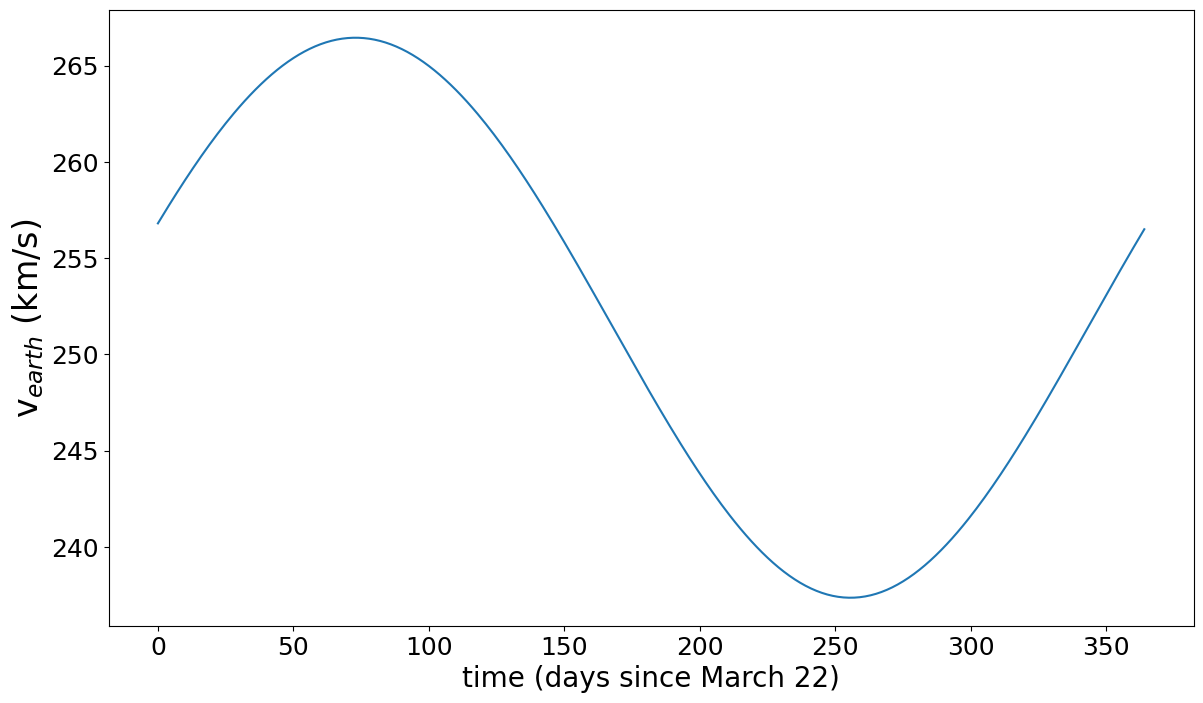

In [69]:
dias = np.arange(0,365)
velocidad = np.zeros((len(dias)))

for i in range (len(dias)):
    velocidad[i]=vearth(dias[i])

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(dias,velocidad)
ax.set_ylabel('v$_{earth}$ (km/s)',fontsize=24)
ax.set_xlabel('time (days since March 22)',fontsize=20)
plt.show()

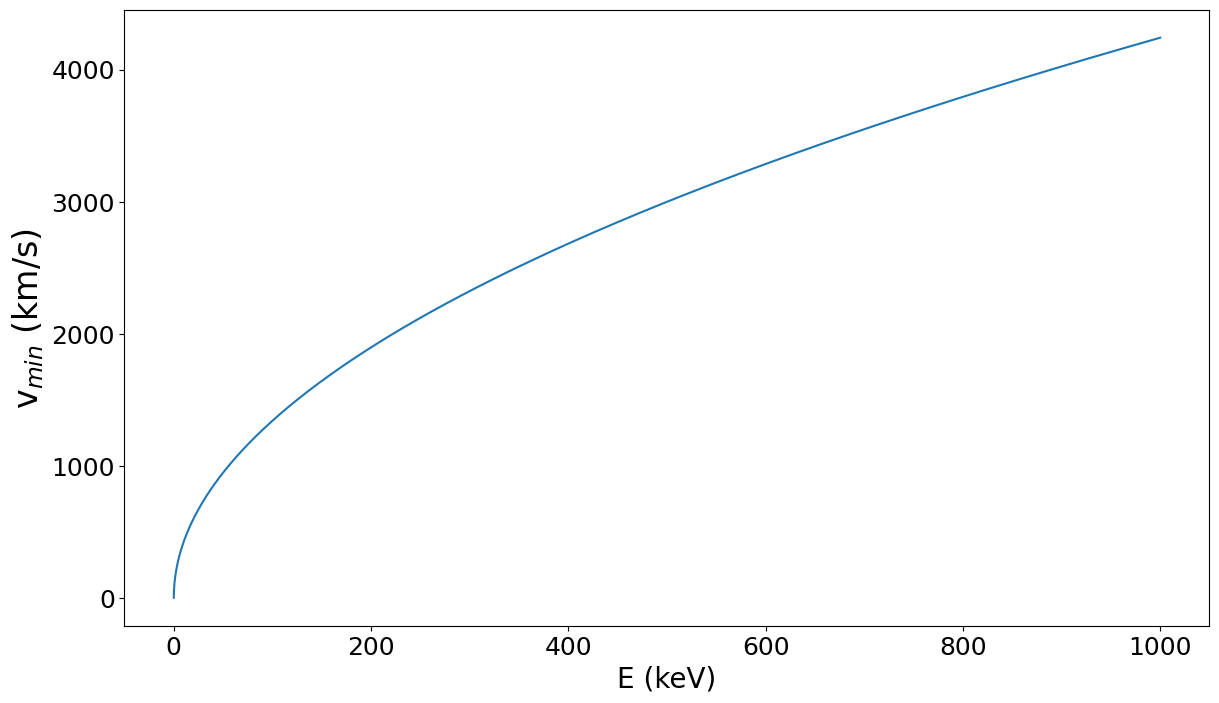

In [71]:
AA=10
masawimp=10
en=np.arange(0.0001,1000,0.1)
resultado=np.array([vmin(i,AA,masawimp) for i in en])
plt.figure(figsize=(14, 8))

ax = plt.subplot()
ax.plot(en,resultado)
ax.set_ylabel('v$_{min}$ (km/s)',fontsize=24)
ax.set_xlabel('E (keV)',fontsize=20)
plt.show()

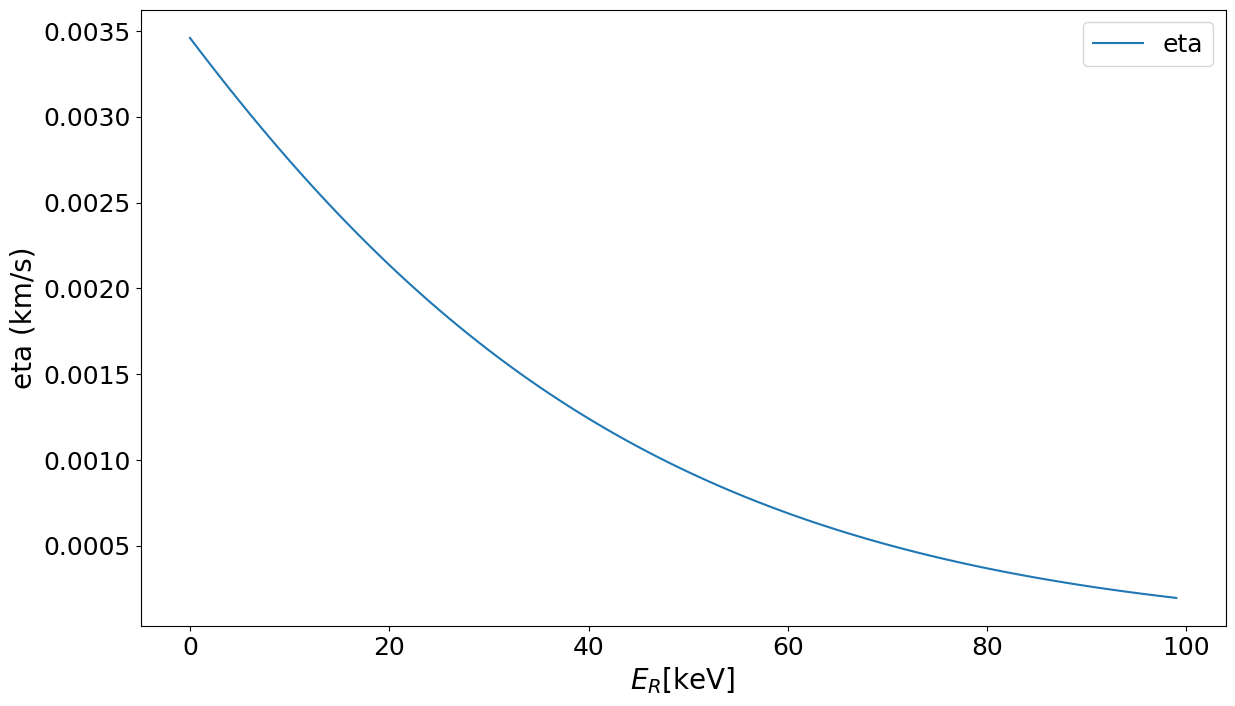

In [72]:
# CHECK eta
timeMax=72.9 # day of maximum earth's velocity: 2nd June, starting from 22 March
timeMin=255.5 # day of minimum earth velocity, starting from 22 March
timeAvg=(timeMax+timeMin)/2.
ene=np.arange(0,100,1)
etas=np.array([eta(e,timeAvg,132,70) for e in ene]) #np.array([eta(e,timeAvg,132,70) for e in ene]) # Xe, mW=70GeV

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(ene,etas, label = "eta")
ax.set_ylabel('eta (km/s)',fontsize=20)
ax.set_xlabel('$E_{R}$'+ '[keV]',fontsize=20)
ax.legend()


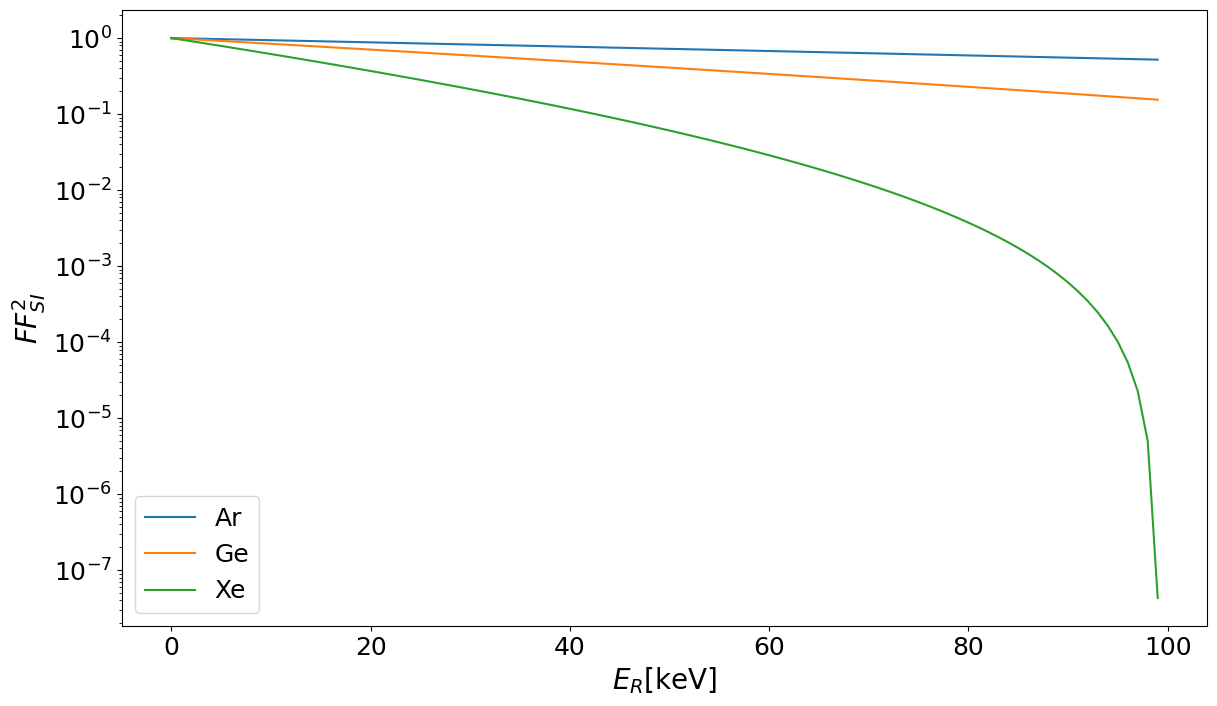

In [73]:
# CHECK Form factor

ffAr=np.array([FF(e,40) for e in ene])
ffGe=np.array([FF(e,72) for e in ene])
ffXe=np.array([FF(e,132) for e in ene])
plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(ene,ffAr, label = "Ar")
ax.plot(ene,ffGe, label = "Ge")
ax.plot(ene,ffXe, label = "Xe")
ax.set_ylabel(r'$FF^{2}_{SI}$',fontsize=20)
ax.set_xlabel(r'$E_{R}$'+ '[keV]',fontsize=20)
ax.legend()
ax.set_yscale("log")

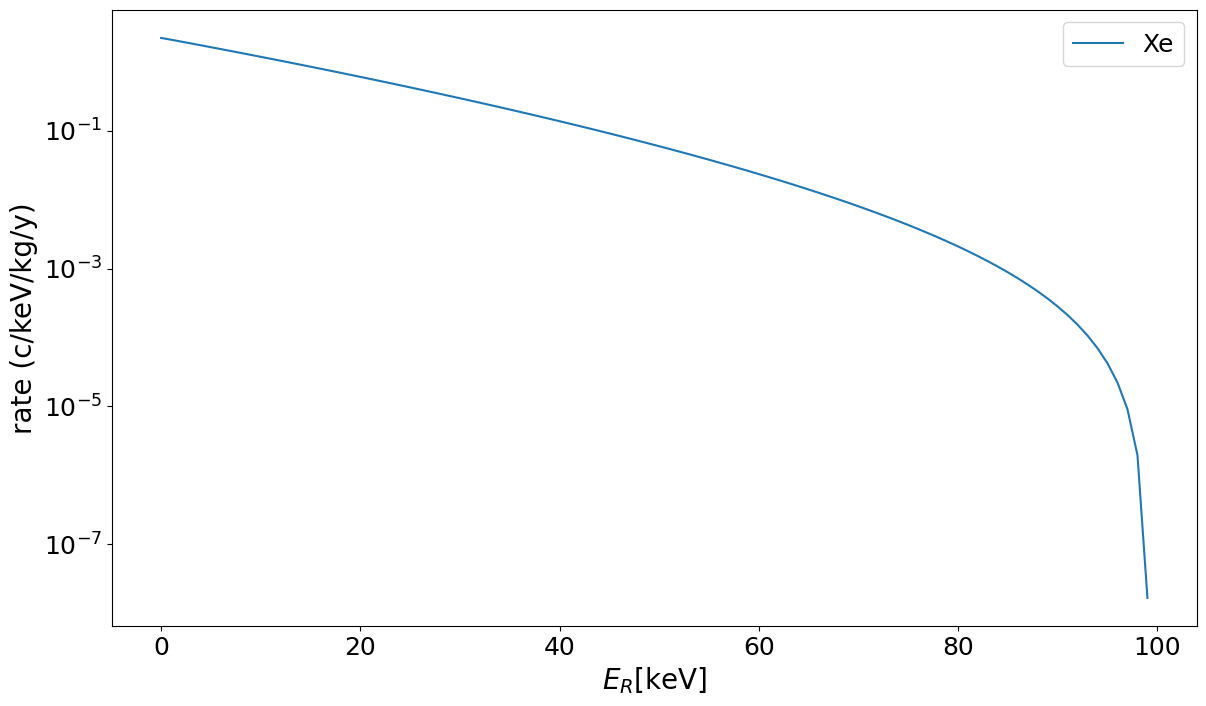

In [75]:
# PLOT differential rate
ene=np.arange(0,100,1)
mW=100
si=1e-45
rateXe=np.array([rate(e,timeAvg,132,mW,si) for e in ene])
plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(ene,rateXe, label = "Xe")
ax.set_ylabel('rate (c/keV/kg/y)',fontsize=20)
ax.set_xlabel('$E_{R}$'+ '[keV]',fontsize=20)
ax.legend()
#ax.set_ylim(1e-11, 1e-3)
ax.set_yscale("log")

Ejercicio 1

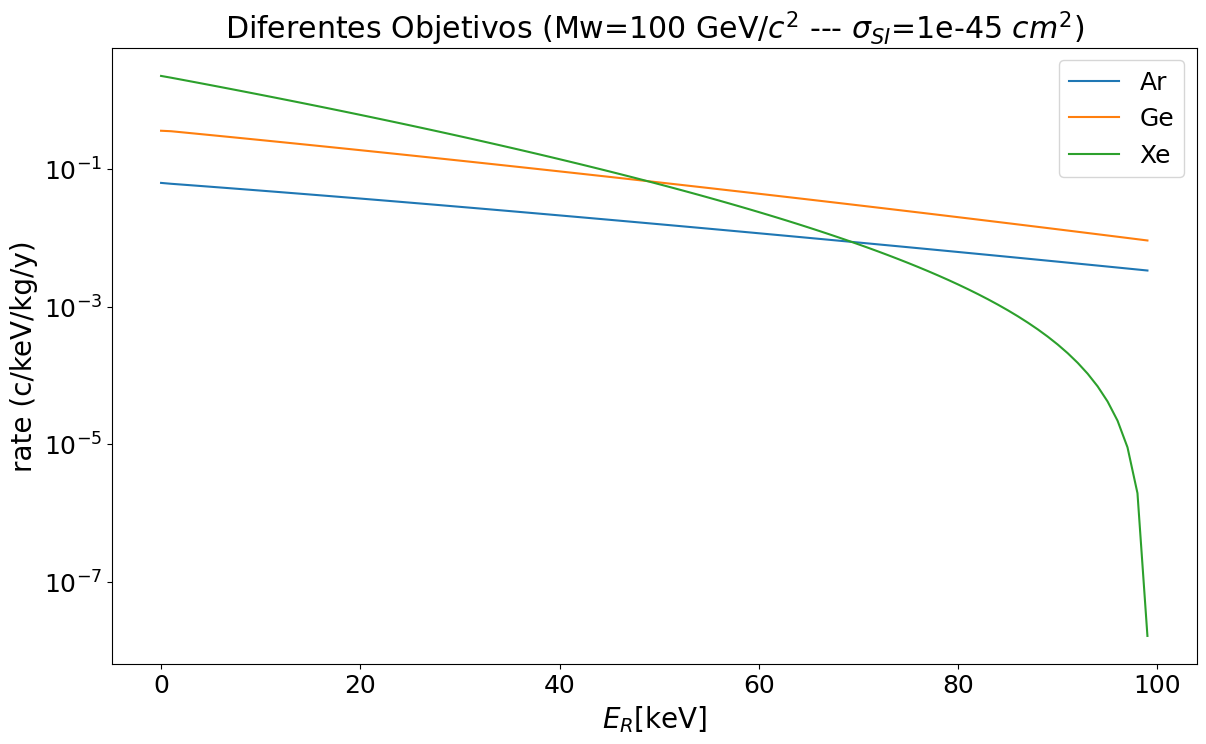

In [76]:

timeMax=72.9 
timeMin=255.5 
timeAvg=(timeMax+timeMin)/2.

mW=100 #masa wimp (geV/c^2)
si=1e-45 #seccion eficaz SI(cm^-2)
ene=np.arange(0,100,1)


rateAr=np.array([rate(e,timeAvg,40,mW,si) for e in ene])
rateGe=np.array([rate(e,timeAvg,72,mW,si) for e in ene])
rateXe=np.array([rate(e,timeAvg,132,mW,si) for e in ene])

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(ene,rateAr, label = "Ar")
ax.plot(ene,rateGe, label = "Ge")
ax.plot(ene,rateXe, label = "Xe")
ax.set_title('Diferentes Objetivos (Mw=' + str(np.round(mW)) + ' GeV/$c^2$ --- $\sigma_{SI}$=' + str(si) + ' $cm^2$)')
ax.set_ylabel('rate (c/keV/kg/y)',fontsize=20)
ax.set_xlabel('$E_{R}$'+ '[keV]',fontsize=20)
ax.legend()
ax.set_yscale("log")

Ejercicio 2

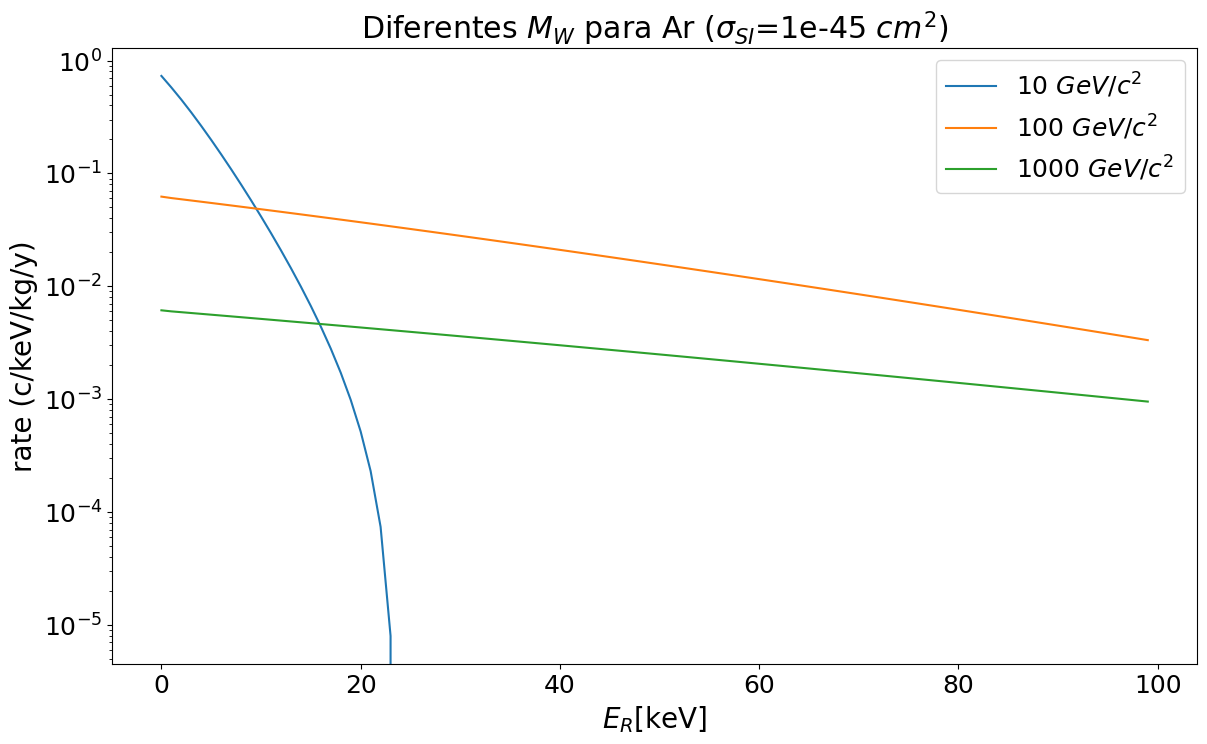

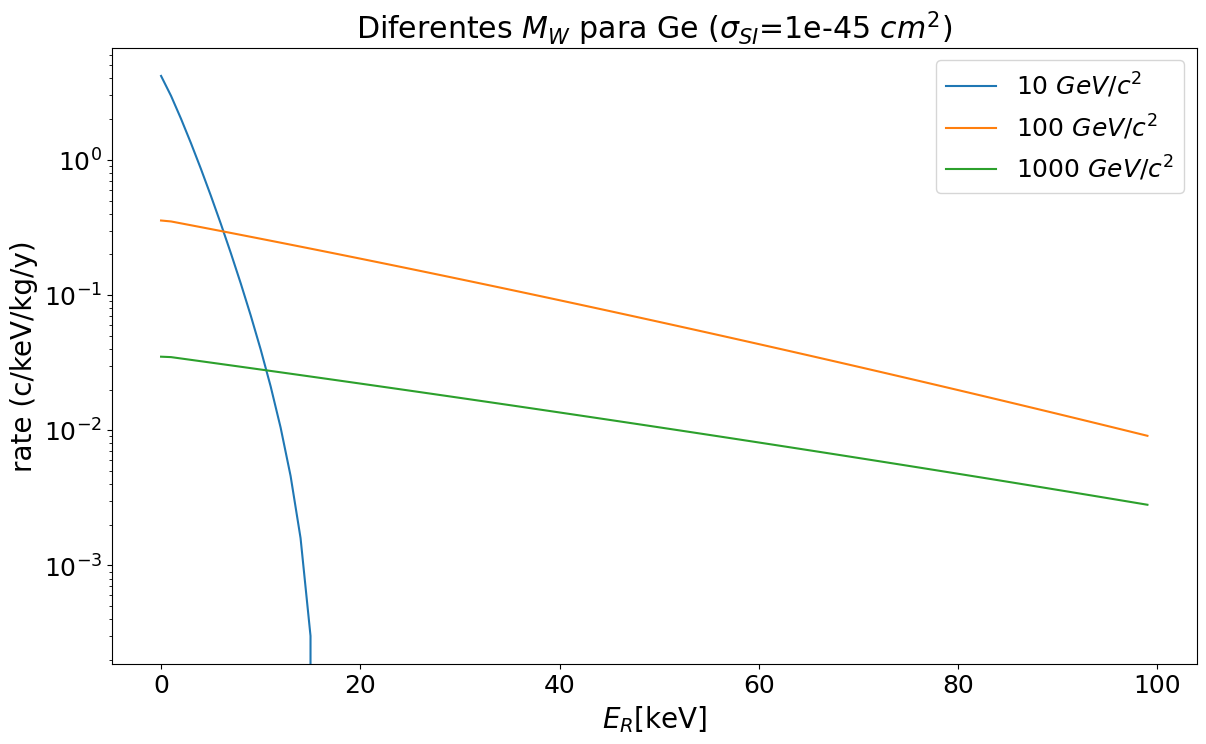

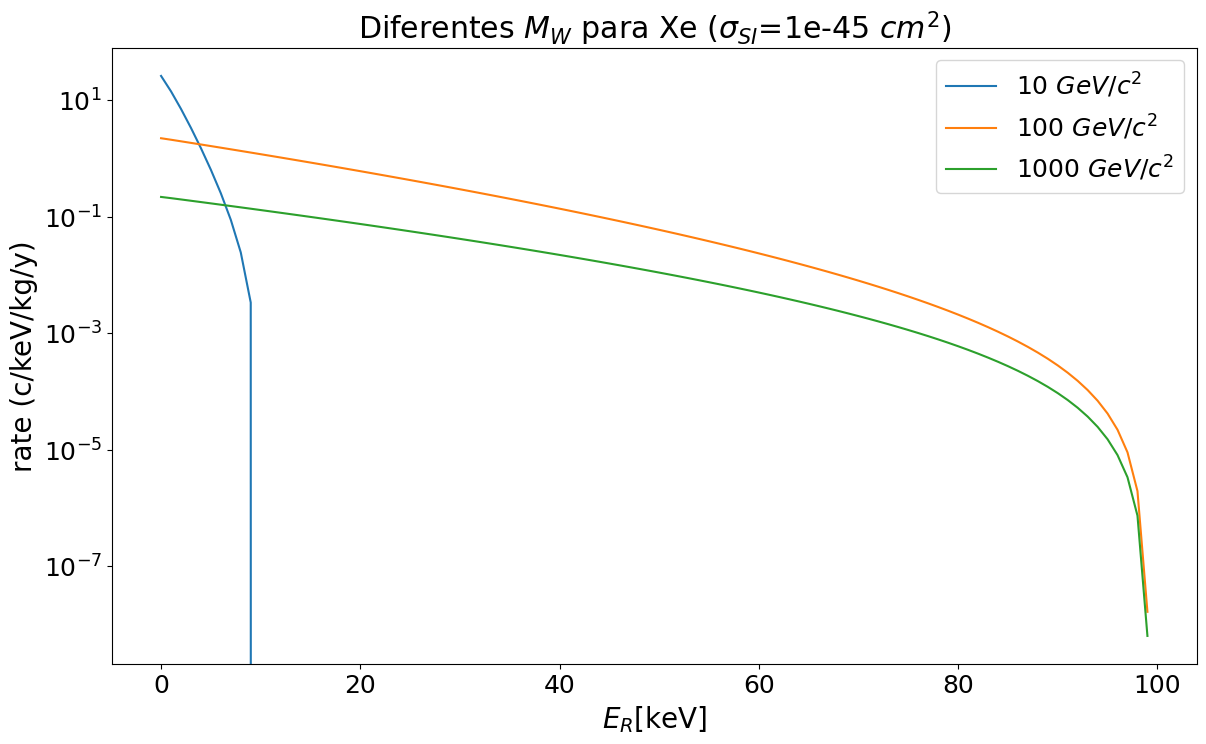

In [77]:

timeMax=72.9 
timeMin=255.5 
timeAvg=(timeMax+timeMin)/2.


si=1e-45 #seccion eficaz SI(cm^-2)
ene=np.arange(0,100,1)


rateAr10=np.array([rate(e,timeAvg,40,10,si) for e in ene])
rateAr100=np.array([rate(e,timeAvg,40,100,si) for e in ene])
rateAr1000=np.array([rate(e,timeAvg,40,1000,si) for e in ene])

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(ene,rateAr10, label = "10 $GeV/c^2$")
ax.plot(ene,rateAr100, label = "100 $GeV/c^2$")
ax.plot(ene,rateAr1000, label = "1000 $GeV/c^2$")
ax.set_title('Diferentes $M_W$ para Ar ($\sigma_{SI}$=' + str(si) + ' $cm^2$)')
ax.set_ylabel('rate (c/keV/kg/y)',fontsize=20)
ax.set_xlabel('$E_{R}$'+ '[keV]',fontsize=20)
ax.legend()
ax.set_yscale("log")

rateGe10=np.array([rate(e,timeAvg,72,10,si) for e in ene])
rateGe100=np.array([rate(e,timeAvg,72,100,si) for e in ene])
rateGe1000=np.array([rate(e,timeAvg,72,1000,si) for e in ene])

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(ene,rateGe10, label = "10 $GeV/c^2$")
ax.plot(ene,rateGe100, label = "100 $GeV/c^2$")
ax.plot(ene,rateGe1000, label = "1000 $GeV/c^2$")
ax.set_title('Diferentes $M_W$ para Ge ($\sigma_{SI}$=' + str(si) + ' $cm^2$)')
ax.set_ylabel('rate (c/keV/kg/y)',fontsize=20)
ax.set_xlabel('$E_{R}$'+ '[keV]',fontsize=20)
ax.legend()
ax.set_yscale("log")

rateXe10=np.array([rate(e,timeAvg,132,10,si) for e in ene])
rateXe100=np.array([rate(e,timeAvg,132,100,si) for e in ene])
rateXe1000=np.array([rate(e,timeAvg,132,1000,si) for e in ene])

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(ene,rateXe10, label = "10 $GeV/c^2$")
ax.plot(ene,rateXe100, label = "100 $GeV/c^2$")
ax.plot(ene,rateXe1000, label = "1000 $GeV/c^2$")
ax.set_title('Diferentes $M_W$ para Xe ($\sigma_{SI}$=' + str(si) + ' $cm^2$)')
ax.set_ylabel('rate (c/keV/kg/y)',fontsize=20)
ax.set_xlabel('$E_{R}$'+ '[keV]',fontsize=20)
ax.legend()
ax.set_yscale("log")


Ejercicio 3

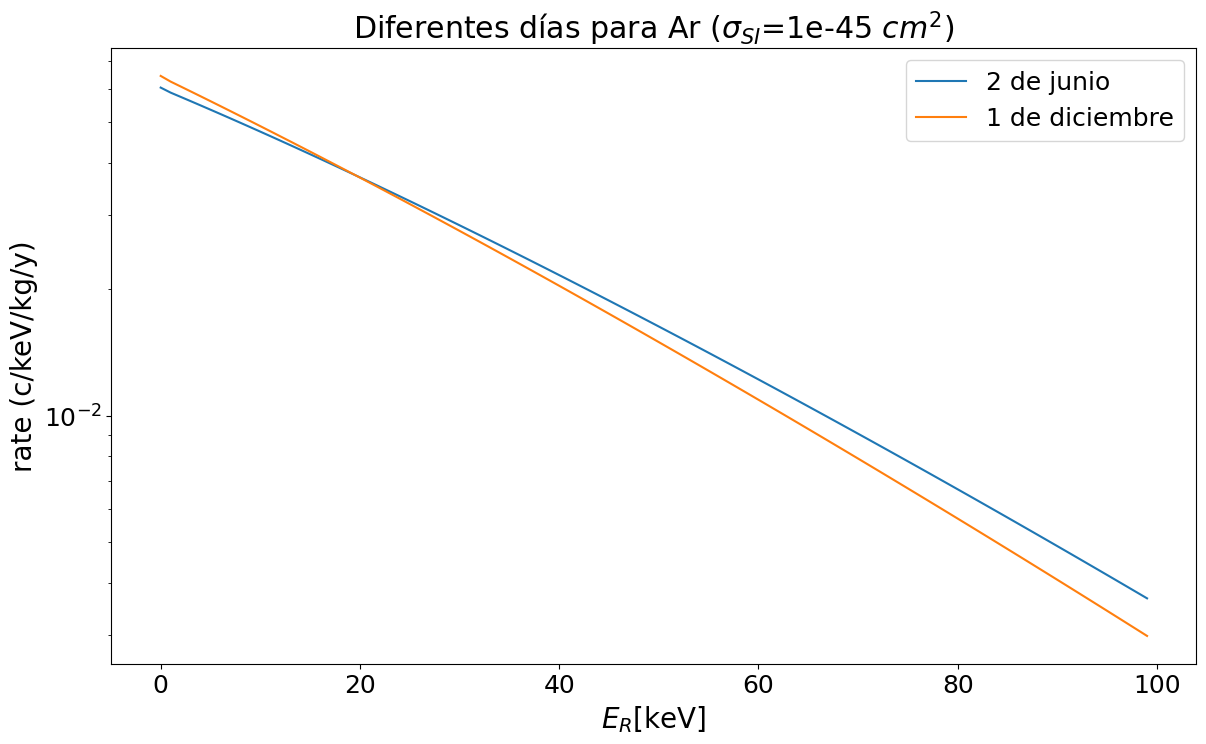

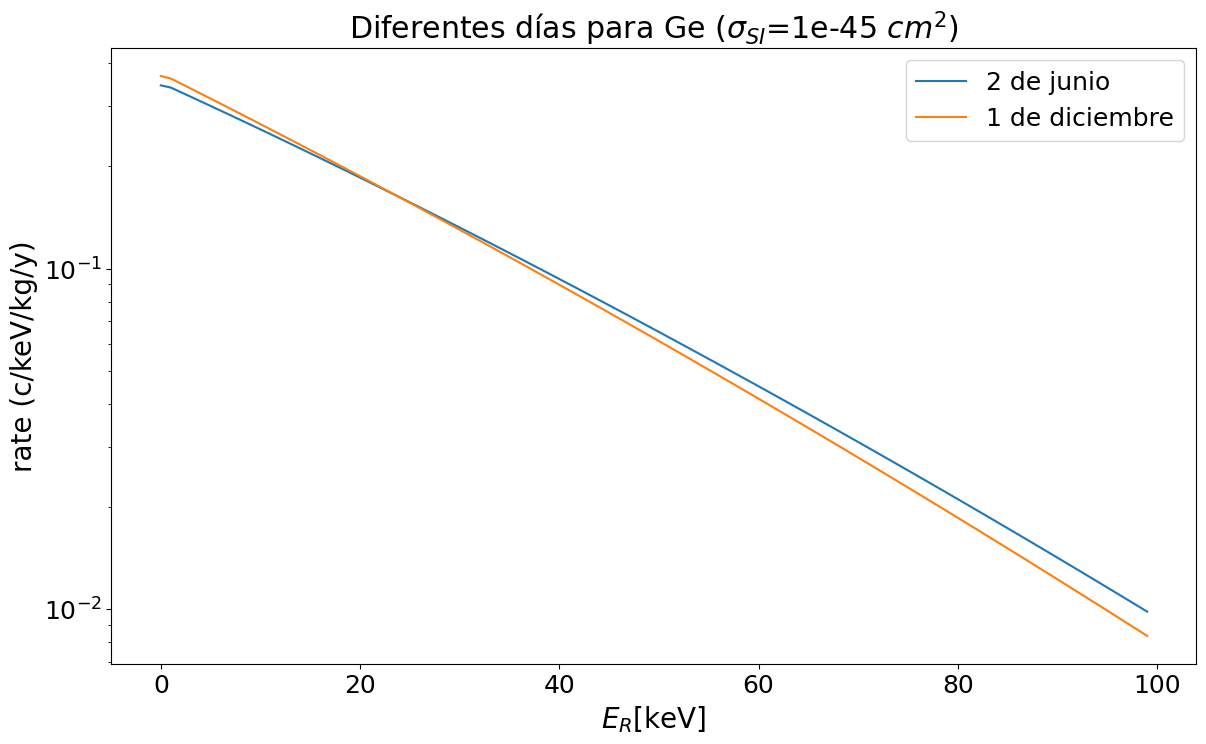

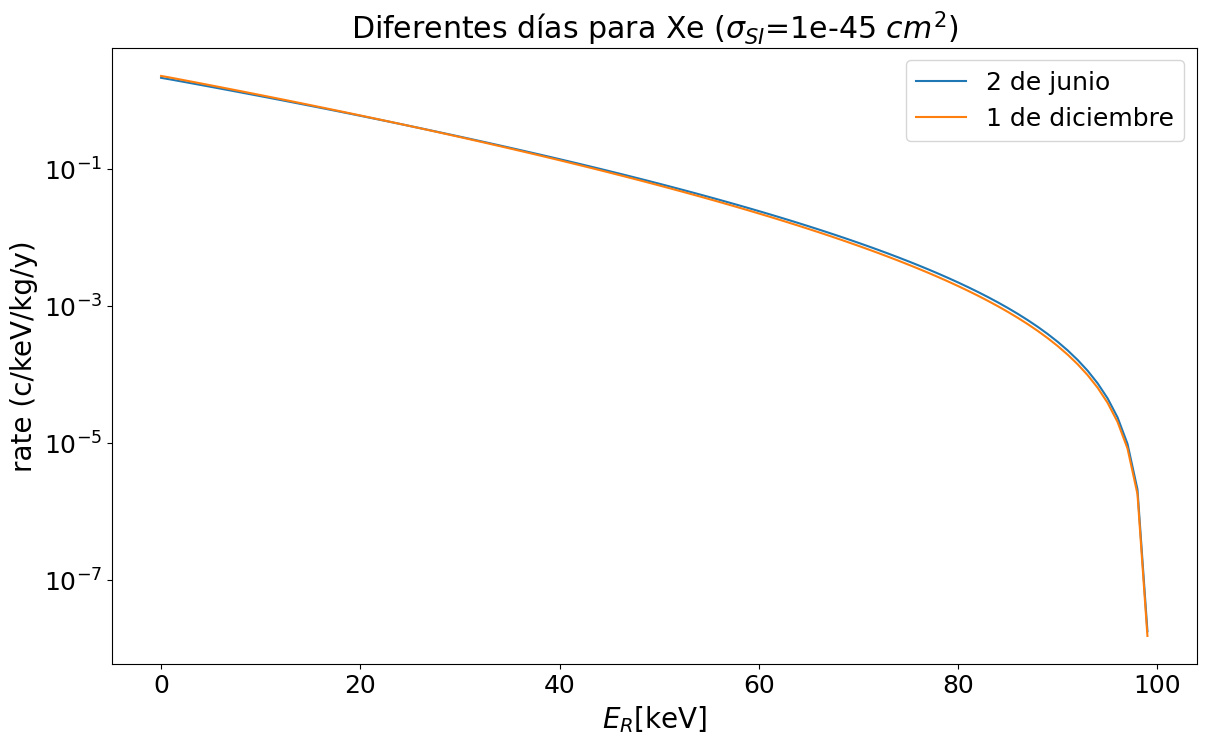

: 

In [ ]:

timeMax=72.9 
timeMin=255.5 

mW=100 #masa wimp (geV/c^2)
si=1e-45 #seccion eficaz SI(cm^-2)
ene=np.arange(0,100,1)


rateArtmax=np.array([rate(e,timeMax,40,mW,si) for e in ene])
rateArtmin=np.array([rate(e,timeMin,40,mW,si) for e in ene])

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(ene,rateArtmax, label = "2 de junio")
ax.plot(ene,rateArtmin, label = "1 de diciembre")

ax.set_title('Diferentes días para Ar ($\sigma_{SI}$=' + str(si) + ' $cm^2$)')
ax.set_ylabel('rate (c/keV/kg/y)',fontsize=20)
ax.set_xlabel('$E_{R}$'+ '[keV]',fontsize=20)
ax.legend()
ax.set_yscale("log")

rateGetmax=np.array([rate(e,timeMax,72,mW,si) for e in ene])
rateGetmin=np.array([rate(e,timeMin,72,mW,si) for e in ene])

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(ene,rateGetmax, label = "2 de junio")
ax.plot(ene,rateGetmin, label = "1 de diciembre")

ax.set_title('Diferentes días para Ge ($\sigma_{SI}$=' + str(si) + ' $cm^2$)')
ax.set_ylabel('rate (c/keV/kg/y)',fontsize=20)
ax.set_xlabel('$E_{R}$'+ '[keV]',fontsize=20)
ax.legend()
ax.set_yscale("log")

rateXetmax=np.array([rate(e,timeMax,132,mW,si) for e in ene])
rateXetmin=np.array([rate(e,timeMin,132,mW,si) for e in ene])

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(ene,rateXetmax, label = "2 de junio")
ax.plot(ene,rateXetmin, label = "1 de diciembre")

ax.set_title('Diferentes días para Xe ($\sigma_{SI}$=' + str(si) + ' $cm^2$)')
ax.set_ylabel('rate (c/keV/kg/y)',fontsize=20)
ax.set_xlabel('$E_{R}$'+ '[keV]',fontsize=20)
ax.legend()
ax.set_yscale("log")

R_max = 429188.0
R_min = 422056.0
R_0 = 425659.0
t_max = 256
Error = 0.00854


Text(0.5, 0, 'time (days since March 22)')

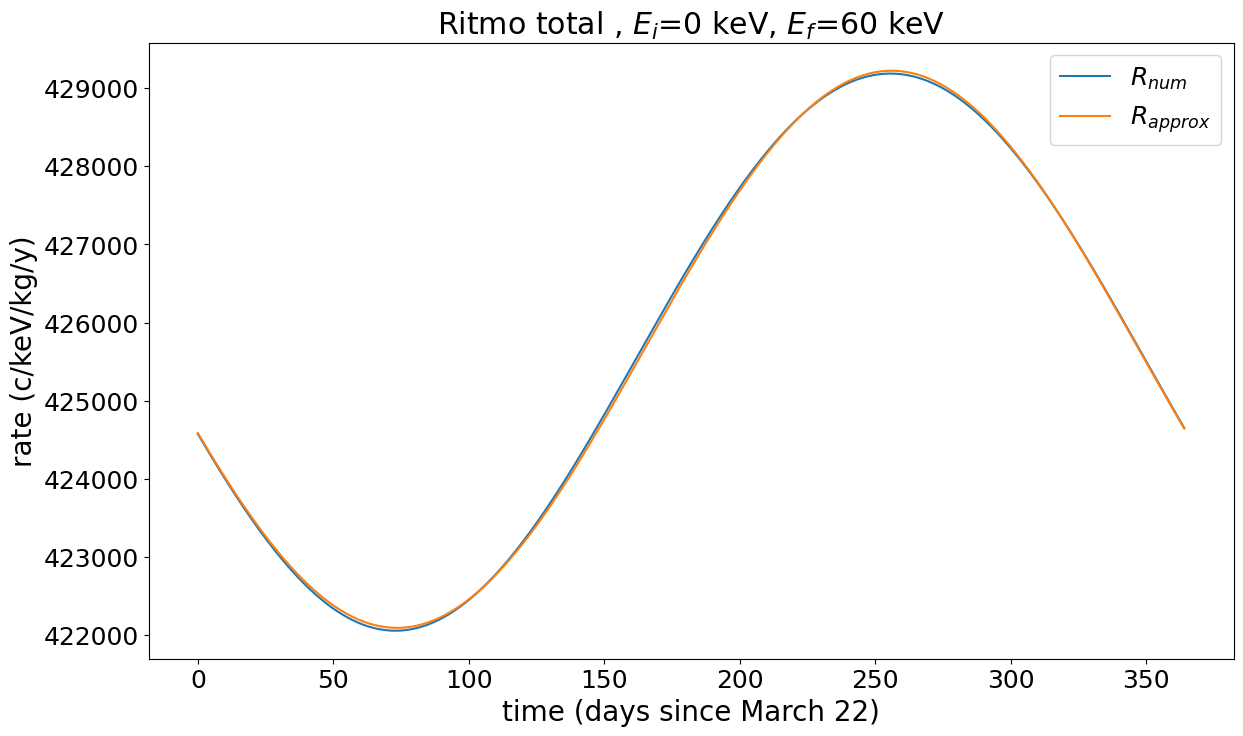

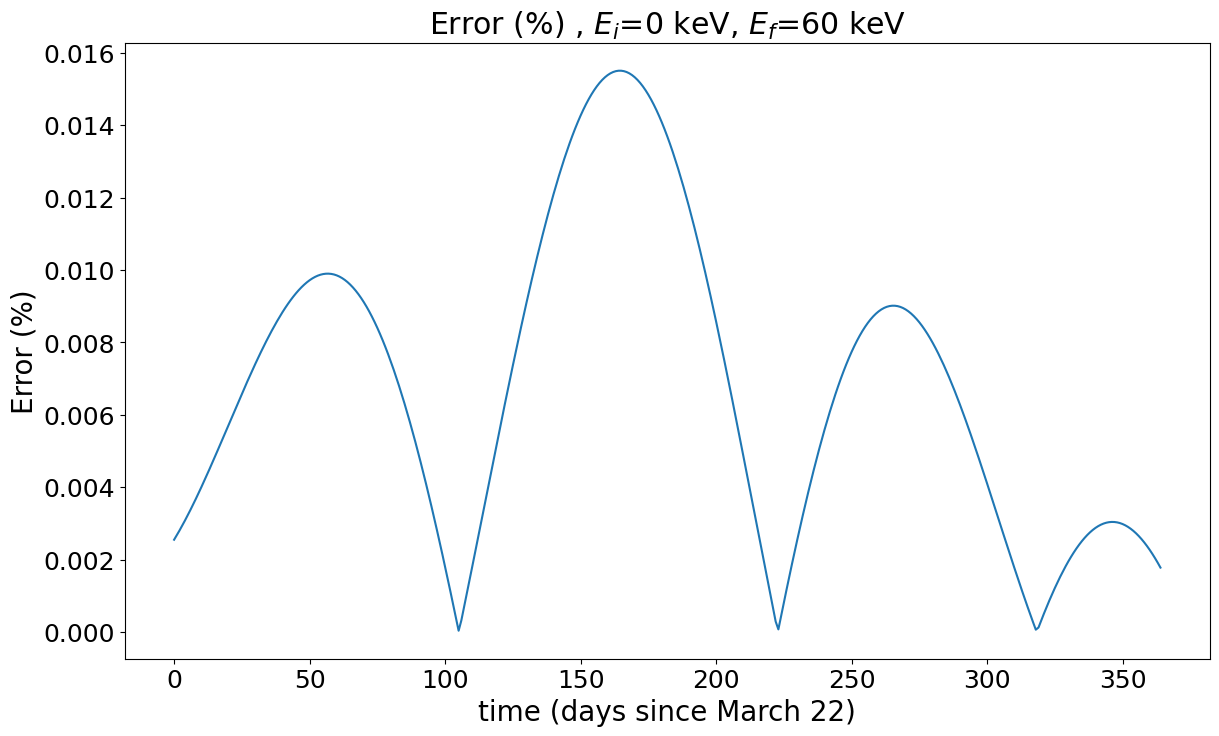

In [66]:

Ei=0
Ef=60
A=132
mW=70
si=1e-41 #seccion eficaz SI(cm^-2)
ritmosvstiempos=ratevsTime(Ei,Ef,A,mW,si)
R_max=np.max(ritmosvstiempos)
print('R_max = '+str(np.round(R_max)))
R_min=np.min(ritmosvstiempos)
print('R_min = '+str(np.round(R_min)))
R_0=np.mean(ritmosvstiempos)
print('R_0 = '+str(np.round(R_0)))
t_max=np.argmax(ritmosvstiempos)
print('t_max = '+str(t_max))

R_mod=0.5*(R_max-R_min)
omega=2*np.pi/365.

dias = np.arange(0,365)

rapprox=([(R_0+R_mod*np.cos(omega*(t-t_max))) for t in dias])

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(dias,ritmosvstiempos, label = "$R_{num}$")
ax.plot(dias,rapprox, label = "$R_{approx}$")
ax.set_title('Ritmo total , $E_i$='+str(Ei)+' keV, $E_f$='+str(Ef)+' keV')
ax.set_ylabel('rate (c/keV/kg/y)',fontsize=20)
ax.set_xlabel('time (days since March 22)',fontsize=20)
ax.legend()


err=([np.abs(((1-rapprox[t]/ritmosvstiempos[t]))*100) for t in dias])
print('Error = '+str(np.round(err[t_max],5)))

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(dias,err, label = "$R_{num}$")
ax.set_title('Error (%) , $E_i$='+str(Ei)+' keV, $E_f$='+str(Ef)+' keV')
ax.set_ylabel('Error (%)',fontsize=20)
ax.set_xlabel('time (days since March 22)',fontsize=20)
#ax.set_yscale("log")



R_max = 196452.0
R_min = 193033.0
R_0 = 194830.0
t_max = 73
Error = 0.04482


Text(0.5, 0, 'time (days since March 22)')

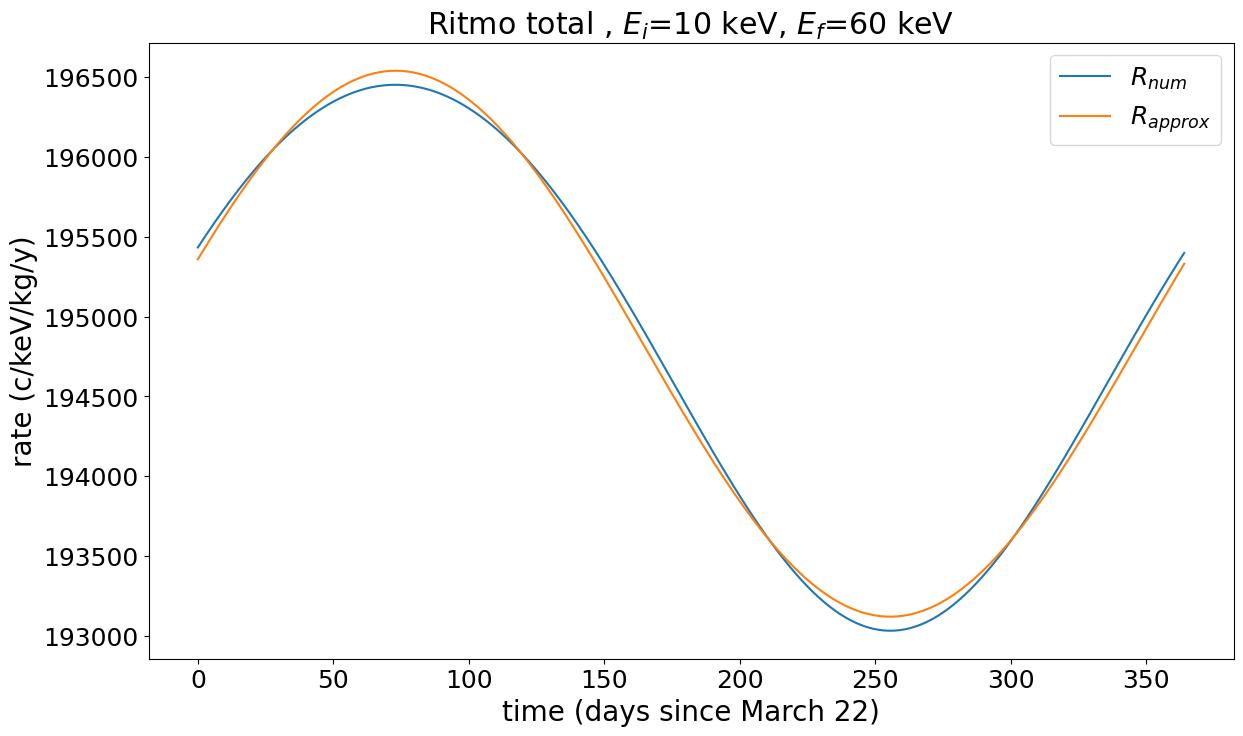

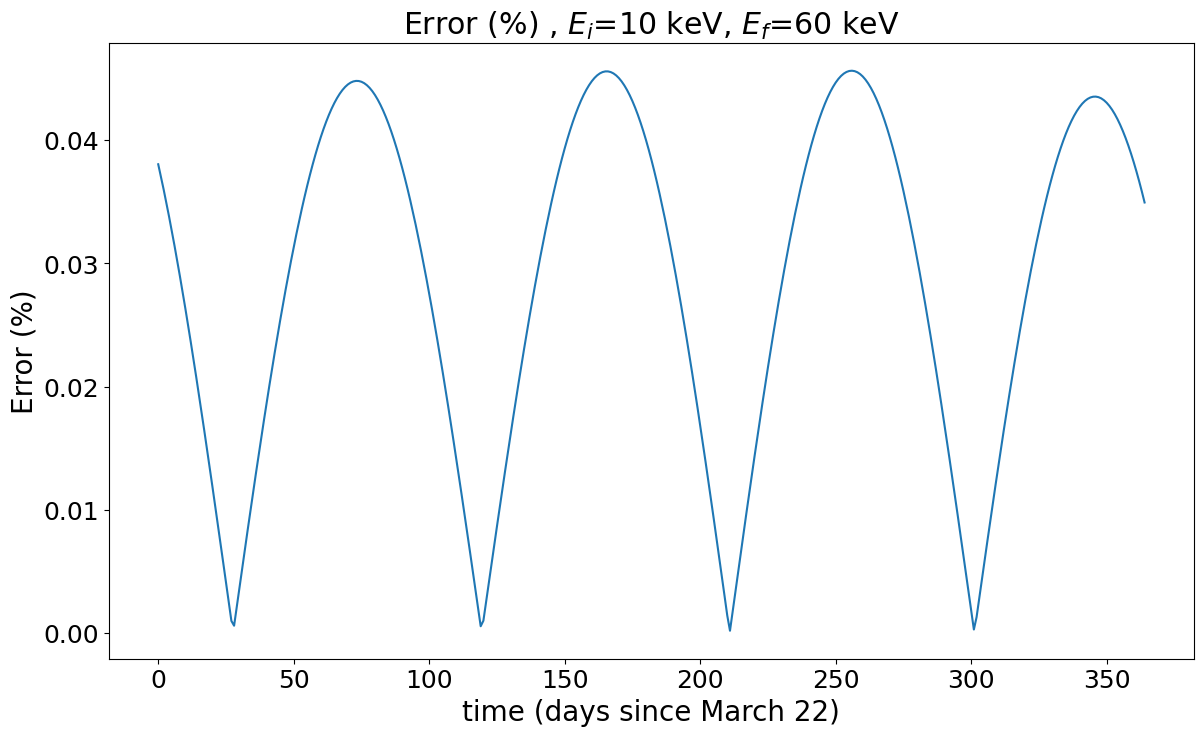

In [67]:
Ei=10
Ef=60
A=132
mW=70
si=1e-41 #seccion eficaz SI(cm^-2)
ritmosvstiempos=ratevsTime(Ei,Ef,A,mW,si)
R_max=np.max(ritmosvstiempos)
print('R_max = '+str(np.round(R_max)))
R_min=np.min(ritmosvstiempos)
print('R_min = '+str(np.round(R_min)))
R_0=np.mean(ritmosvstiempos)
print('R_0 = '+str(np.round(R_0)))
t_max=np.argmax(ritmosvstiempos)
print('t_max = '+str(t_max))

R_mod=0.5*(R_max-R_min)
omega=2*np.pi/365.

dias = np.arange(0,365)

rapprox=([(R_0+R_mod*np.cos(omega*(t-t_max))) for t in dias])

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(dias,ritmosvstiempos, label = "$R_{num}$")
ax.plot(dias,rapprox, label = "$R_{approx}$")
ax.set_title('Ritmo total , $E_i$='+str(Ei)+' keV, $E_f$='+str(Ef)+' keV')
ax.set_ylabel('rate (c/keV/kg/y)',fontsize=20)
ax.set_xlabel('time (days since March 22)',fontsize=20)
ax.legend()


err=([np.abs(((1-rapprox[t]/ritmosvstiempos[t]))*100) for t in dias])
print('Error = '+str(np.round(err[t_max],5)))

plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(dias,err, label = "$R_{num}$")
ax.set_title('Error (%) , $E_i$='+str(Ei)+' keV, $E_f$='+str(Ef)+' keV')
ax.set_ylabel('Error (%)',fontsize=20)
ax.set_xlabel('time (days since March 22)',fontsize=20)
#ax.set_yscale("log")

